In [14]:
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
import numpy as np


In [5]:
model = load_model('ann_model_DLR.h5', custom_objects={'mse': MeanSquaredError()})

In [20]:
alldata=pd.read_pickle('/Volumes/GYM/DLR/Intermediate/3.Model_valiadtion_WeatherStation/10m/Model_validation_WeatherStation_2023')
alldata = alldata.iloc[:, :-3]
data=alldata[alldata.Elevation==296.3]


In [21]:

data.shape

(5999, 31)

In [22]:
def cloudQC_filter(alldata):
    alldata.loc[alldata['DQF_CTH'] == 4, 'CTH'] = 0
    invalid_DQF_CTH = [3, 1, 6, 2, 5]
    alldata.loc[alldata['DQF_CTH'].isin(invalid_DQF_CTH), 'CTH'] = np.nan

    alldata.loc[alldata['DQF_CTT'] == 4, 'CTT'] = 0
    invalid_DQF_CTH = [3, 1, 6, 2, 5]
    alldata.loc[alldata['DQF_CTT'].isin(invalid_DQF_CTH), 'CTT'] = np.nan

    DQF_COD_raw = alldata['DQF_COD'].fillna(99).astype(int).values
    DQF_COD_mask = (DQF_COD_raw & 30)
    DQF_COD_mask2 = np.where(DQF_COD_raw == 99, np.nan, DQF_COD_mask)
    alldata['DQF_COD_msk'] = DQF_COD_mask2

    alldata.loc[alldata['DQF_COD_msk'] == 6, 'COD'] = 0
    invalid_DQF_COD = [2, 4, 8, 10, 12, 14, 16]
    alldata.loc[alldata['DQF_COD_msk'].isin(invalid_DQF_COD), 'COD'] = np.nan
    alldata = alldata.dropna()
    return alldata


In [12]:
features=['lat_site', 'lon_site', 'elv', 'jday', 'hour','zen', 'TA_10m','relative_humidity','wind_speed', 'station_level_pressure','CTT','CTH','COD','year']
label=['DLR_CERES']

In [27]:
data=cloudQC_filter(data)
X=data[features]
Y=data[label]
X.shape


(3407, 14)

In [41]:
data.head()

,Latitude,Longitude,Elevation,temperature,temperature_Source_Code,station_level_pressure,station_level_pressure_Quality_Code,station_level_pressure_Source_Code,wind_speed,wind_speed_Source_Code,...,DQF_COD,DQF_COD_msk,TA_10m,zen,year,jday,hour,DLR_XGboost,DLR_RF,DLR_CERES
2023-01-01 00:00:00,37.1522,-94.4953,296.3,12.2,343.0,972.7,4.0,343.0,4.1,343.0,...,1.0,0.0,12.148,99.776581,2023,1,0,314.946411,322.026777,285.274994
2023-01-01 01:00:00,37.1522,-94.4953,296.3,12.8,343.0,973.7,4.0,343.0,4.6,343.0,...,1.0,0.0,12.748,111.167724,2023,1,1,317.046753,319.334514,281.075012
2023-01-01 02:00:00,37.1522,-94.4953,296.3,11.7,343.0,974.0,4.0,343.0,4.6,343.0,...,7.0,6.0,11.648,122.949780,2023,1,2,297.341217,292.693357,275.975006
2023-01-01 03:00:00,37.1522,-94.4953,296.3,10.6,343.0,974.4,4.0,343.0,3.6,343.0,...,7.0,6.0,10.548,134.891148,2023,1,3,287.722198,291.127566,275.475006
2023-01-01 04:00:00,37.1522,-94.4953,296.3,10.0,343.0,974.7,4.0,343.0,4.1,343.0,...,7.0,6.0,9.948,146.682969,2023,1,4,289.364563,294.703400,271.774994


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler_input = MinMaxScaler()
scaler_label = MinMaxScaler()

In [29]:
scaler_input.fit(X)
scaler_label.fit(Y)

MinMaxScaler()

In [30]:
X_scaled = scaler_input.transform(X)
Y_scaled = scaler_label.transform(Y)

In [31]:
predictions = model.predict(
    x=X_scaled,
)

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step


In [32]:
Pre_inverse=scaler_label.inverse_transform(predictions)
Y_inverse=scaler_label.inverse_transform(Y_scaled)

In [ ]:
def multipl(a,b):
    sumofab=0.0
    for i in range(len(a)):
        temp=a[i]*b[i]
        sumofab+=temp
    return sumofab
def correlation(x, y):
    n = len(x)
    sum1 = sum(x)
    sum2 = sum(y)
    sumofxy = multipl(x, y)
    sumofx2 = sum([pow(i, 2) for i in x])
    sumofy2 = sum([pow(j, 2) for j in y])
    num = sumofxy - (float(sum1) * float(sum2) / n)
    den = np.sqrt((sumofx2 - float(sum1 ** 2) / n) * (sumofy2 - float(sum2 ** 2) / n))
    r = num / den
    r2 = r * r
    return str('%.2f' % (r2))

def regress(x,y):
    from sklearn import  linear_model
    regr = linear_model.LinearRegression()
    t = np.array(x)
    t = np.array([x]).T
    regr.fit(t, y)
    #k = str('%.2f'%(regr.intercept_))
    #b = str('%.2f'%(regr.coef_))
    k = regr.coef_
    b = regr.intercept_
    KB = [k,b]
    return KB
def RMSE(x, y):
    rmse = np.sqrt(np.mean((x - y) ** 2))
    rmse = round(rmse, 2)
    return str('%.2f' % (rmse))


def MAE(x, y):
    mae = np.mean(abs(x - y))
    # mae = np.mean(x - y)
    mae = round(mae, 2)
    return str('%.2f' % (mae))
def plot_data(ax, x, y, Xmin, Xmax, Ymin, Ymax, Xinter, Yinter,Lables):
    from matplotlib.colors import LogNorm
    # z_min = 0
    # z_max = 500
    nbins = 100
    # global plot
    H, xedges, yedges = np.histogram2d(x, y, bins=nbins)
    H = np.rot90(H)
    H = np.flipud(H)
    # H_freq = H / H.sum()
    Hmasked = np.ma.masked_where(H == 0, H)  # Mask pixels with a value of zero
    z_min_dynamic = Hmasked.min()
    z_max_dynamic = Hmasked.max()
    z_min = z_min_dynamic
    z_min = np.percentile(Hmasked.compressed(), 5)
    z_max = np.percentile(Hmasked.compressed(), 95)
    # norm = LogNorm(vmin=z_min, vmax=z_max)
    plot = ax.pcolormesh(xedges, yedges, Hmasked, cmap='jet', vmin=z_min, vmax=z_max)
    cbar = plt.colorbar(plot, ax=ax)
    # plot = ax.pcolormesh(xedges, yedges, Hmasked, cmap='jet', norm = LogNorm(vmin=z_min, vmax=z_max))
    # pt.colorbar()
    # cbar.ax.set_yticklabels(('0', '1', '2', '3', '4','5','6','7','8','9','10'),fontname='Calibri',fontsize=14,fontweight='bold')
    # cbar.ax.set_ylabel('Frequency')

    # y=x
    xx = [Xmin, Xmax]
    yy = [Xmin, Xmax]
    ax.plot(xx, yy, 'k--', linewidth=2.)

    aa = regress(x, y)
    ax.plot(x, x * aa[0] + aa[1], 'r', linewidth=1.)
    k = str('%.2f' % (aa[0]))
    b = str('%.2f' % (aa[1]))
    ax.set_ylim(Ymin, Ymax)
    ax.set_xlim(Xmin, Xmax)
    my_x_ticks = np.arange(Xmin, Xmax + Xinter, Xinter)
    my_y_ticks = np.arange(Ymin, Ymax + Yinter, Yinter)
    ax.set_xticks(my_x_ticks)
    ax.set_yticks(my_y_ticks)
    ax.set_xlabel(Lables[0], fontname='Calibri', fontsize=16)
    ax.set_ylabel(Lables[1], fontname='Calibri', fontsize=16)

    ax.set_xlabel(Lables[0], fontname='Calibri', fontsize=16)
    ax.set_ylabel(Lables[1], fontname='Calibri', fontsize=16)
    ax.text(Xmin + Xinter / 3, Ymax - Yinter / 3, r"N = " + str(len(x)),
            {'color': 'k', 'fontname': 'Calibri', 'fontsize': 14, 'fontweight': 'bold'})
    ax.text(Xmin + Xinter / 3, Ymax - 2 * Yinter / 3, r"R$^2$ = " + correlation(x, y),
            {'color': 'k', 'fontname': 'Calibri', 'fontsize': 14, 'fontweight': 'bold'})
    ax.text(Xmin + Xinter / 3, Ymax - 3 * Yinter / 3, r"RMSE = " + RMSE(x, y),
            {'color': 'k', 'fontname': 'Calibri', 'fontsize': 14, 'fontweight': 'bold'})
    ax.text(Xmin + Xinter / 3, Ymax - 4 * Yinter / 3, r"MAE = " + MAE(x, y),
            {'color': 'k', 'fontname': 'Calibri', 'fontsize': 14, 'fontweight': 'bold'})
    ax.text(Xmin + Xinter / 3, Ymax - 5 * Yinter / 3, r"Y = " + k + " X + " + b,
            {'color': 'k', 'fontname': 'Calibri', 'fontsize': 14, 'fontweight': 'bold'})
    ax.set_title(Lables[2])
    # plt.colorbar()
    result = [len(x), correlation(x, y), RMSE(x, y), MAE(x, y), k, b]
    return result
def scatterplot(ax, Xdata, Ydata, Xmin, Xmax, Ymin, Ymax, Xinter, Yinter,Lables):
    from scipy.stats import gaussian_kde
    xy = np.vstack([Xdata, Ydata])  # 
    z = gaussian_kde(xy)(xy)  # 
    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = Xdata[idx], Ydata[idx], z[idx]

    plt.scatter(x, y, c=z, s=10, cmap='jet')  # 
    xx = [Xmin, Xmax]
    yy = [Xmin, Xmax]
    ax.plot(xx, yy, 'k--', linewidth=0.5)
    aa = regress(x, y)
    # ax.plot(x, x * aa[0] + aa[1], 'k', linewidth=0.5)
    k = str('%.2f' % (aa[0]))
    b = str('%.2f' % (aa[1]))
    ax.set_ylim(Ymin, Ymax)
    ax.set_xlim(Xmin, Xmax)
    my_x_ticks = np.arange(Xmin, Xmax + Xinter, Xinter)
    my_y_ticks = np.arange(Ymin, Ymax + Yinter, Yinter)
    ax.set_xticks(my_x_ticks)
    ax.set_yticks(my_y_ticks)
    # ax.set_xticklabels(('0', '5', '10', '15', '20'), fontname='Calibri', fontsize=16)
    # ax.set_yticklabels(('0', '5', '10', '15', '20'), fontname='Calibri', fontsize=16)
    ax.set_xlabel(Lables[0], fontname='Calibri', fontsize=16)
    ax.set_ylabel(Lables[1], fontname='Calibri', fontsize=16)
    ax.text(Xmin+Xinter/3, Ymax-Yinter/3, r"N = " + str(len(Xdata)),
            {'color': 'k', 'fontname': 'Calibri', 'fontsize': 14, 'fontweight': 'bold'})
    ax.text(Xmin+Xinter/3, Ymax-2*Yinter/3, r"R$^2$ = " + correlation(Xdata, Ydata),
            {'color': 'k', 'fontname': 'Calibri', 'fontsize': 14, 'fontweight': 'bold'})
    ax.text(Xmin+Xinter/3, Ymax-3*Yinter/3, r"RMSE = " + RMSE(Xdata, Ydata),
            {'color': 'k', 'fontname': 'Calibri', 'fontsize': 14, 'fontweight': 'bold'})
    ax.text(Xmin+Xinter/3, Ymax-4*Yinter/3, r"MAE = " + MAE(Xdata, Ydata),
            {'color': 'k', 'fontname': 'Calibri', 'fontsize': 14, 'fontweight': 'bold'})
    ax.text(Xmin+Xinter / 3, Ymax - 5 * Yinter / 3, r"Y = "+k+" X + "+b,
            {'color': 'k', 'fontname': 'Calibri', 'fontsize': 14, 'fontweight': 'bold'})
    ax.set_title(Lables[2])
    plt.colorbar()
    result=[len(Xdata),correlation(Xdata, Ydata),RMSE(Xdata, Ydata),MAE(Xdata, Ydata),k,b]
    return result

In [34]:
Y_inverse2=Y_inverse.reshape(-1)
Pre_inverse2=Pre_inverse.reshape(-1)

/var/folders/n1/zydkpbg91lb27p4jtp0w1q340000gq/T/ipykernel_65209/304093471.py:74: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  k = str('%.2f' % (aa[0]))


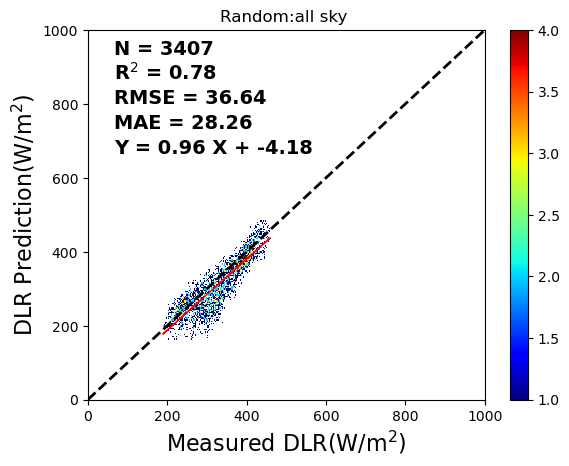

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
result_sites=plot_data(ax, Y_inverse2, Pre_inverse2,0, 1000, 0, 1000, 200, 200, ['Measured DLR(W/m$^2$)', 'DLR Prediction(W/m$^2$)', 'Random'+ ':all sky '])


In [46]:
data['Prediction'] = Pre_inverse2

In [47]:
data.head()

,Latitude,Longitude,Elevation,temperature,temperature_Source_Code,station_level_pressure,station_level_pressure_Quality_Code,station_level_pressure_Source_Code,wind_speed,wind_speed_Source_Code,...,DQF_COD_msk,TA_10m,zen,year,jday,hour,DLR_XGboost,DLR_RF,DLR_CERES,Prediction
2023-01-01 00:00:00,37.1522,-94.4953,296.3,12.2,343.0,972.7,4.0,343.0,4.1,343.0,...,0.0,12.148,99.776581,2023,1,0,314.946411,322.026777,285.274994,289.127045
2023-01-01 01:00:00,37.1522,-94.4953,296.3,12.8,343.0,973.7,4.0,343.0,4.6,343.0,...,0.0,12.748,111.167724,2023,1,1,317.046753,319.334514,281.075012,290.493835
2023-01-01 02:00:00,37.1522,-94.4953,296.3,11.7,343.0,974.0,4.0,343.0,4.6,343.0,...,6.0,11.648,122.949780,2023,1,2,297.341217,292.693357,275.975006,291.244141
2023-01-01 03:00:00,37.1522,-94.4953,296.3,10.6,343.0,974.4,4.0,343.0,3.6,343.0,...,6.0,10.548,134.891148,2023,1,3,287.722198,291.127566,275.475006,288.863220
2023-01-01 04:00:00,37.1522,-94.4953,296.3,10.0,343.0,974.7,4.0,343.0,4.1,343.0,...,6.0,9.948,146.682969,2023,1,4,289.364563,294.703400,271.774994,293.374664


In [ ]:
data.index = pd.to_datetime(data.index)

one_day_data = data.loc['2023-03-15']
data_numeric = data.apply(pd.to_numeric, errors='coerce')
daily_mean = data_numeric.resample('D').mean()

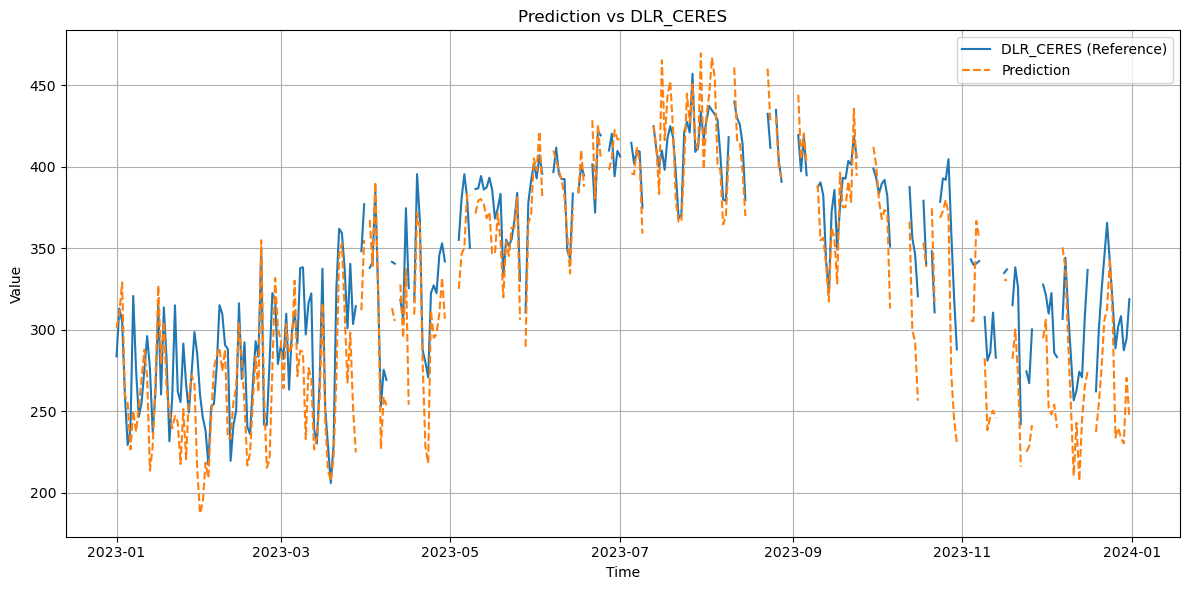

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(daily_mean.index, daily_mean['DLR_CERES'], label='DLR_CERES (Reference)')
plt.plot(daily_mean.index, daily_mean['Prediction'], label='Prediction', linestyle='--')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Prediction vs DLR_CERES')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()